#Import Libraries

In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
  f1_score, roc_auc_score,confusion_matrix, classification_report, roc_curve, auc)

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset


import warnings
warnings.filterwarnings("ignore")

#Load the medical dataset

In [225]:
# Load the medical dataset from github
file_path = 'https://raw.githubusercontent.com/PeroumalPajany/tmp/main/heart_disease.csv'
multiplier = 5
dff = pd.read_csv(file_path)
print(len(dff))
df = pd.concat([dff] * multiplier, ignore_index=True)
print(len(df))
df.head()

1190
5950


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [226]:
df.isnull()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5945,False,False,False,False,False,False,False,False,False,False,False,False
5946,False,False,False,False,False,False,False,False,False,False,False,False
5947,False,False,False,False,False,False,False,False,False,False,False,False
5948,False,False,False,False,False,False,False,False,False,False,False,False


In [227]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5950 entries, 0 to 5949
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  5950 non-null   int64  
 1   sex                  5950 non-null   int64  
 2   chest pain type      5950 non-null   int64  
 3   resting bp s         5950 non-null   int64  
 4   cholesterol          5950 non-null   int64  
 5   fasting blood sugar  5950 non-null   int64  
 6   resting ecg          5950 non-null   int64  
 7   max heart rate       5950 non-null   int64  
 8   exercise angina      5950 non-null   int64  
 9   oldpeak              5950 non-null   float64
 10  ST slope             5950 non-null   int64  
 11  target               5950 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 557.9 KB


None

#Visualize

In [228]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.355056,0.424741,0.935166,18.362647,101.386387,0.409774,0.870066,25.509055,0.487196,1.085972,0.610254,0.499225
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,270.000000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


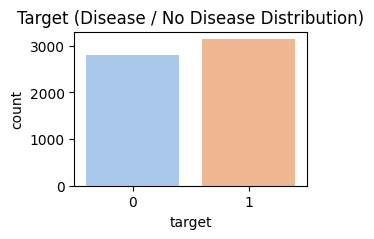

target
1    3145
0    2805
Name: count, dtype: int64

In [229]:
plt.figure(figsize=(3,2))
sns.countplot(x='target', data = df, palette='pastel')
plt.title('Target (Disease / No Disease Distribution)')
plt.show()

display(df['target'].value_counts())

<Axes: xlabel='age', ylabel='Count'>

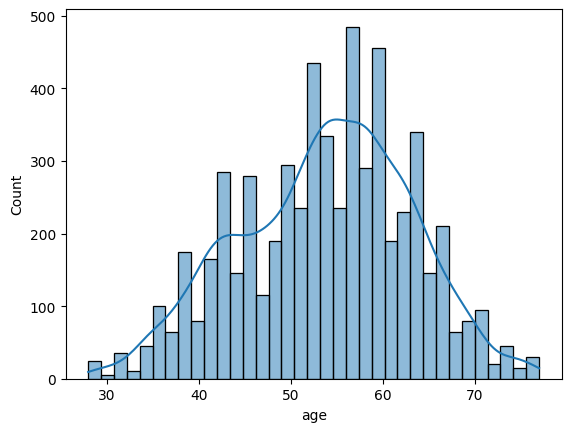

In [230]:
sns.histplot(df['age'], kde=True)

#Pre Processing  

1. Drop the invalid data
2. Binary classification (target checks)
3. Encode numeric and non-numeric data

In [231]:

df.dropna(inplace=True)

df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

category_columns = df.select_dtypes(include=['object']).columns

label_encoders = {}
for column in category_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])



# Spilt data for training and testing

In [232]:

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features for Neural Networks

In [233]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



# Helper classes for SNN, DNN, & CNN

Reference: https://pytorch.org/tutorials/

In [234]:
class SNN(nn.Module):
    def __init__(self, input_size):
        super(SNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.fc2 = nn.Linear(16, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [235]:
class DNN(nn.Module):
    def __init__(self, input_size):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x


In [236]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        x, _ = self.rnn(x, h0)
        x = self.fc(x[:, -1, :])
        return x

In [237]:
class CNN(nn.Module):
    def __init__(self, input_channels, input_height, input_width, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, 16, kernel_size=(1, 3), stride=1, padding=(0, 1))
        self.conv2 = nn.Conv2d(16, 32, kernel_size=(1, 3), stride=1, padding=(0, 1))
        self.pool = nn.MaxPool2d(kernel_size=(1, 2), stride=(1, 2))
        self.fc1 = nn.Linear(32 * input_height * (input_width // 2), 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = torch.relu(self.conv2(x))
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Helper Method to Train Models

In [238]:
def train_the_dl_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=20):

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        model.eval()
        with torch.no_grad():
            correct, total = 0, 0
            for inputs, labels in test_loader:
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy:.2f}%')
    return model

# Helper Method to evaluate Models

In [239]:
def evaluate_the_dl_model(model, test_loader):

    model.eval()
    all_preds, all_labels, all_probs = [], [], []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            probs = nn.functional.softmax(outputs, dim=1)[:, 1]
            all_preds.extend(predicted.numpy())
            all_probs.extend(probs.numpy())
            all_labels.extend(labels.numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    roc_auc = roc_auc_score(all_labels, all_probs)
    cm = confusion_matrix(all_labels, all_preds)
    cr = classification_report(all_labels, all_preds, target_names=['No Disease', 'Disease'])
    fpr, tpr, _ = roc_curve(all_labels, all_probs)

    return accuracy, precision, recall, f1, roc_auc, cm, cr, fpr, tpr

#Train Models

## Configure Training Parameters

In [240]:
input_size = X_train.shape[1]
print(input_size)
num_classes = 2
hidden_size = 32
num_layers = 1
lr = 0.01

snn_model = SNN(input_size)
dnn_model = DNN(input_size)
rnn_model = RNN(input_size, hidden_size, num_layers, num_classes)
cnn_model = CNN(1, 1, input_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer_snn = optim.Adam(snn_model.parameters(), lr=lr)
optimizer_dnn = optim.Adam(dnn_model.parameters(), lr=lr)
optimizer_rnn = optim.Adam(rnn_model.parameters(), lr=lr)
optimizer_cnn = optim.Adam(cnn_model.parameters(), lr=lr)


11


## Train the models

In [241]:
import time
st = time.time()
print("\nTraining Shallow NN (SNN):")
trained_snn = train_the_dl_model(snn_model, train_loader, test_loader, criterion, optimizer_snn)
snn_time = (time.time() - st)
print("Training Shallow NN (SNN) took %s seconds" % snn_time)

st = time.time()
print("\nTraining Deep Neural Network (DNN):")
trained_dnn = train_the_dl_model(dnn_model, train_loader, test_loader, criterion, optimizer_dnn)
dnn_time = (time.time() - st)
print("Training Deep Neural Network (DNN) took %s seconds" % dnn_time )


X_train_rnn = torch.tensor(X_train[:, np.newaxis, :], dtype=torch.float32)
X_test_rnn = torch.tensor(X_test[:, np.newaxis, :], dtype=torch.float32)
train_rnn_dataset = TensorDataset(X_train_rnn, y_train_tensor)
test_rnn_dataset = TensorDataset(X_test_rnn, y_test_tensor)
train_rnn_loader = DataLoader(train_rnn_dataset, batch_size=32, shuffle=True)
test_rnn_loader = DataLoader(test_rnn_dataset, batch_size=32, shuffle=False)

st = time.time()
print("\nTraining Recurrent Neural Network (RNN):")
trained_rnn = train_the_dl_model(rnn_model, train_rnn_loader, test_rnn_loader, criterion, optimizer_rnn)
rnn_time = (time.time() - st)
print("Training Recurrent Neural Network (RNN) took %s seconds" % rnn_time)

X_train_cnn = torch.tensor(X_train[:, np.newaxis, np.newaxis, :], dtype=torch.float32)
X_test_cnn = torch.tensor(X_test[:, np.newaxis, np.newaxis, :], dtype=torch.float32)
train_cnn_dataset = TensorDataset(X_train_cnn, y_train_tensor)
test_cnn_dataset = TensorDataset(X_test_cnn, y_test_tensor)
train_cnn_loader = DataLoader(train_cnn_dataset, batch_size=32, shuffle=True)
test_cnn_loader = DataLoader(test_cnn_dataset, batch_size=32, shuffle=False)

st = time.time()
print("\nTraining Convolutional Neural Network (CNN):")
trained_cnn = train_the_dl_model(cnn_model, train_cnn_loader, test_cnn_loader, criterion, optimizer_cnn)
cnn_time = (time.time() - st)
print("Training Convolutional Neural Network (CNN) took %s seconds" % cnn_time)



Training Shallow NN (SNN):
Epoch [1/20], Loss: 0.3868, Accuracy: 83.87%
Epoch [2/20], Loss: 0.3223, Accuracy: 85.55%
Epoch [3/20], Loss: 0.3012, Accuracy: 87.82%
Epoch [4/20], Loss: 0.2880, Accuracy: 87.31%
Epoch [5/20], Loss: 0.2713, Accuracy: 87.14%
Epoch [6/20], Loss: 0.2660, Accuracy: 88.66%
Epoch [7/20], Loss: 0.2554, Accuracy: 87.56%
Epoch [8/20], Loss: 0.2513, Accuracy: 89.50%
Epoch [9/20], Loss: 0.2490, Accuracy: 89.16%
Epoch [10/20], Loss: 0.2429, Accuracy: 87.39%
Epoch [11/20], Loss: 0.2379, Accuracy: 89.16%
Epoch [12/20], Loss: 0.2319, Accuracy: 88.07%
Epoch [13/20], Loss: 0.2311, Accuracy: 90.67%
Epoch [14/20], Loss: 0.2295, Accuracy: 89.50%
Epoch [15/20], Loss: 0.2293, Accuracy: 90.08%
Epoch [16/20], Loss: 0.2211, Accuracy: 91.09%
Epoch [17/20], Loss: 0.2199, Accuracy: 91.01%
Epoch [18/20], Loss: 0.2133, Accuracy: 91.26%
Epoch [19/20], Loss: 0.2082, Accuracy: 91.60%
Epoch [20/20], Loss: 0.2097, Accuracy: 88.91%
Training Shallow NN (SNN) took 7.531172037124634 seconds

Tra

## Evaluate Metrics

In [242]:

acc_snn, pre_snn, rec_snn, f1_snn, roc_auc_snn, cm_snn, cr_snn, fpr_snn, tpr_snn = evaluate_the_dl_model(trained_snn, test_loader)
acc_dnn, pre_dnn, rec_dnn, f1_dnn, roc_auc_dnn, cm_dnn, cr_dnn, fpr_dnn, tpr_dnn = evaluate_the_dl_model(trained_dnn, test_loader)
acc_rnn, pre_rnn, rec_rnn, f1_rnn, roc_auc_rnn, cm_rnn, cr_rnn, fpr_rnn, tpr_rnn = evaluate_the_dl_model(trained_rnn, test_rnn_loader)
acc_cnn, pre_cnn, rec_cnn, f1_cnn, roc_auc_cnn, cm_cnn, cr_cnn, fpr_cnn, tpr_cnn = evaluate_the_dl_model(trained_cnn, test_cnn_loader)

metrics = {
    'Metric': ['Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1 Score (%)', 'AUC (%)', 'Run Time (Sec)'],
    'SNN': [f'{acc_snn * 100:.4f}', f'{pre_snn * 100:.4f}', f'{rec_snn * 100:.4f}', f'{f1_snn * 100:.4f}', f'{roc_auc_snn * 100:.4f}', f'{snn_time:.5f}'],
    'DNN': [f'{acc_dnn * 100:.4f}', f'{pre_dnn * 100:.4f}', f'{rec_dnn * 100:.4f}', f'{f1_dnn * 100:.4f}', f'{roc_auc_dnn * 100:.4f}', f'{dnn_time:.5f}'],
    'RNN': [f'{acc_rnn * 100:.4f}', f'{pre_rnn * 100:.4f}', f'{rec_rnn * 100:.4f}', f'{f1_rnn * 100:.4f}', f'{roc_auc_rnn * 100:.4f}', f'{rnn_time:.5f}'],
    'CNN': [f'{acc_cnn * 100:.4f}', f'{pre_cnn * 100:.4f}', f'{rec_cnn * 100:.4f}', f'{f1_cnn * 100:.4f}', f'{roc_auc_cnn * 100:.4f}', f'{cnn_time:.5f}']
}

mdf = pd.DataFrame(metrics)

display(mdf)


,Metric,SNN,DNN,RNN,CNN
0,Accuracy (%),88.9076,99.8319,99.0756,97.0588
1,Precision (%),94.5614,99.6885,98.7597,96.1832
2,Recall (%),84.2188,100.0000,99.5312,98.4375
3,F1 Score (%),89.0909,99.8440,99.1440,97.2973
4,AUC (%),97.1116,99.9986,99.8480,99.5565
5,Run Time (Sec),7.53117,5.75145,6.74844,10.91577


# Plot ROC curve

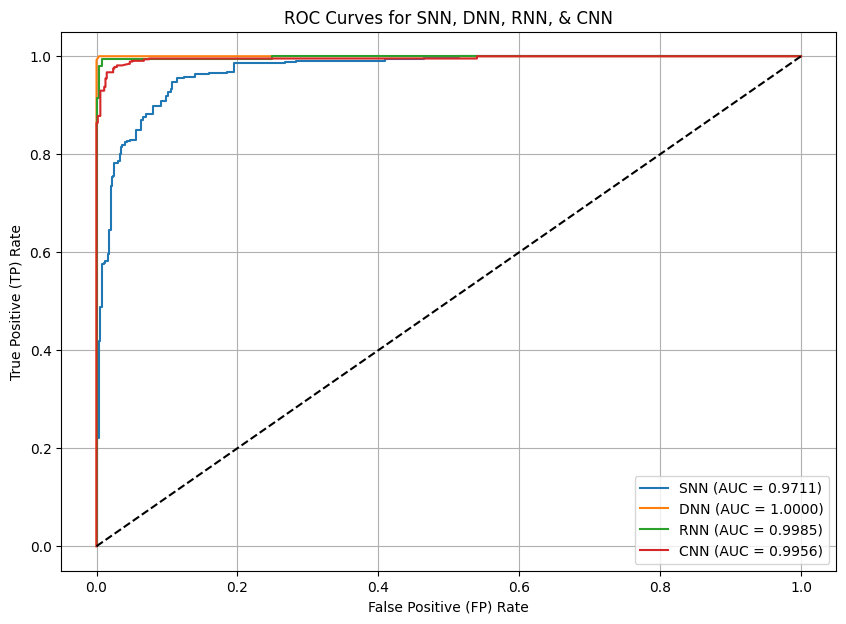

In [243]:

plt.figure(figsize=(10, 7))
plt.plot(fpr_snn, tpr_snn, label=f"SNN (AUC = {roc_auc_snn:.4f})")
plt.plot(fpr_dnn, tpr_dnn, label=f"DNN (AUC = {roc_auc_dnn:.4f})")
plt.plot(fpr_rnn, tpr_rnn, label=f"RNN (AUC = {roc_auc_rnn:.4f})")
plt.plot(fpr_cnn, tpr_cnn, label=f"CNN (AUC = {roc_auc_cnn:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive (FP) Rate")
plt.ylabel("True Positive (TP) Rate")
plt.title("ROC Curves for SNN, DNN, RNN, & CNN")
plt.legend()
plt.grid()
plt.show()
